Name: McHale Trotter

# Using Curve Fitting to Plot the Motion of a Model Rocket

In this project, I will find a curve fit of thrust data of a C6-5 model rocket (thrust vs. time). This curve fit function will then be used to plot the motion of the model rocket and find it's peak altitude.

In [1]:
import ode
import numpy as np #used for arrays and numerical functions
import pandas as pd #used for reading a data file
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit #used to find the fit parameters

## Reading in the Data
First, the data file 'thrust-time-data.txt' is read in. Next, the time and thrust values are put into arrays so that they can be plotted on a graph.

In [6]:
print("The first five data points:")
# Read the data file. The result is a dataframe object, which is named df in this case.
df = pd.read_csv('thrust-time-data.txt', sep='\t')

#print first five rows of data with the header
print(df.head())

The first five data points:
   t (s)     F (N)
0   0.00  0.521146
1   0.02  1.096904
2   0.04  1.854481
3   0.06  2.763573
4   0.08  4.218120


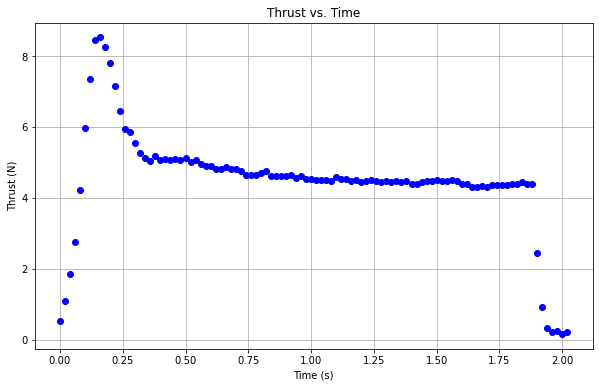

In [7]:
# give variable names to the columns of data
xdata = df['t (s)']
ydata = df['F (N)']

# plot data
fig = plt.figure(figsize=(10,6))
plt.title('Thrust vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Thrust (N)')
plt.grid(which='both', axis='both')
plt.plot(xdata,ydata,'bo')
plt.show()

## Creating the Curve Fit
Now that the values are all contained in the xdata and ydata arrays, we can input our data into an eight parameter function to create a curve fit for the thrust of the model rocket. This function will give us parameters that can be used to model the rocket's motion.

![rocket-function.png](rocket-function.png)

**The parameters:**

a: The amplitude of the curve.

b: The centroid of the curve, (the time that it takes to reach the amplitude).

k: The width of the peak, (larger values cause a more narrow peak).

m: This determines how sharply the function can drop off. 

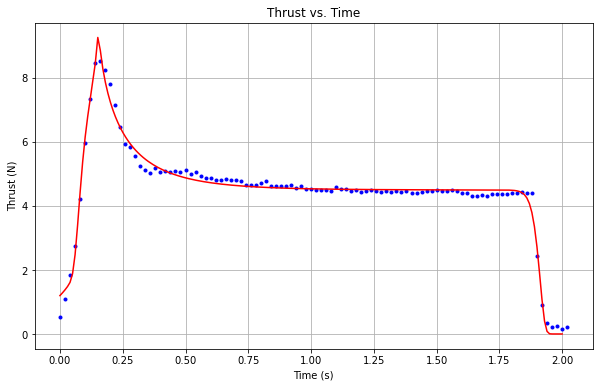

The curve fit parameters are: 5.245, 5.530, 0.153, 0.352, 4.496, 55.933, 0.993, 24.001


In [20]:
# define the model; this function returns y(x) for a given x and fit parameters
def model(x, a1, k1, b1, m1, a2, k2, b2, m2):

    thrust = a1 * np.exp(-k1*((x-b1)**2)**m1) + a2 * np.exp(-k2*((x-b2)**2)**m2)

    return thrust

# define arrays for the data
xdata = df['t (s)']
ydata = df['F (N)']

# define the model function; this function returns y(x) for a given x and fit parameters

# Find best fit parameters
guess=[10,10,0.15,1,1,1,1,1] # this is the initial guess for the fit parameters; you need a 1 for each parameter
params, covariance = curve_fit(model, xdata, ydata, p0=guess)


# calculate points for the model
xmodel = np.linspace(0, 2, 200)
ymodel = model(xmodel,*params)

# plot data and model
plt.figure(figsize=(10,6))
plt.title("Thrust vs. Time")
plt.xlabel("Time (s)")
plt.ylabel("Thrust (N)")
plt.plot(xdata,ydata,'.b') # data
plt.plot(xmodel,ymodel,'-r') #model
plt.grid()
plt.show()

#results
residuals = model(xdata,*params) - ydata
print("The curve fit parameters are: {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}, {:.3f}".format(*params))

## Using the Parameters to Model the Rocket's Motion
Next, the motion of the rocket can be plotted using the parameters that were just obtained. In order to do this, we need to declare the rocket's attributes:

Cd = 0.75, This is a typical value for the drag coefficient of a model rocket. This is based on the cross-sectional area.

r = 0.009 meters, this is the radius of a C6-5 rocket engine.

m = 0.163.6 kg, this is a typical mass for a C type model rocket including its shell, engine, and fuel.

NOTE: The rocket's loss of mass due to fuel exhaustion is not accounted for in the model. We would expect to see it accelerate slightly further than shown in this demo.

In [28]:
g = 9.8 #N/kg
Cd = 0.75 # A typical value for the drag coefficient of a model rocket.
rho = 1.2 # kg/m^3 
r = 0.009 # m (This is the radius of a C type model rocket.)
m = 0.1636 # kg (Find mass of C6-5 rocket, (shell, engine, fuel))
A = np.pi*r**2

#NOTE: Not taking into account the loss of mass from burning rocket fuel

The quaddrag function below calculates and returns the derivative of each quantity in an array that is passed in at time t. This function is used to calculate the gravity, drag, and thrust forces of the rocket. The gravity and drag forces are constant, while the thrust will vary by the parameters that are passed in.

NOTE: This model does not include the lift of the rocket because it is positioned to only go directly upwards. Thus, the x-axis will not be modelled.

In [29]:
def quaddrag(d, t):
    """ Calculate and return the derivative of each quantity in an array d at the time t.
    
    Keyword arguments:
    t -- time at the beginning of the time step
    d -- an array of variables at time t
    """
    
    y = d[0]
    vy = d[1]
    
    dydt = vy
    
    v = vy
    
    Fthrust = model(t,*params)
    Fdragy = -1/2*Cd*rho*A*v**2
    Fgravy = -m*g
    
    Fnety = Fgravy + Fdragy + Fthrust
    
    dvydt = Fnety/m
    
    derivs = np.array([dydt, dvydt])
    
    return derivs

Finally, the rocket's motion can be modelled. Lists tlist and ylist are created to store data of the rocket's motion. Next, the data is passed into an ODE with the quaddrag function to determine the rocket's altitude over the course of its flight.

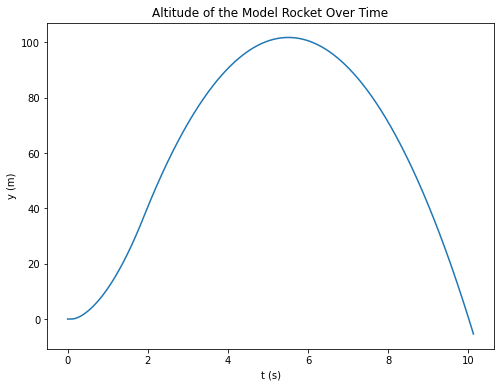

In [30]:
t = 0 #time in s
h = 0.01 #time step in s

# initial position and velocity components
y = 0
vy = 0

# lists for storing data to graph
tlist = []
ylist = []

# store initial values
tlist.append(t)
ylist.append(y)

data = np.array([y,vy])

# compute
while y >= -5:
    
    data = ode.RK4(quaddrag, data, t, h)
    t = t + h
    
    y = data[0]
    
    tlist.append(t)
    ylist.append(y)
    
# Plot the trajectory
plt.figure(figsize = (8,6))
plt.title("Altitude of the Model Rocket Over Time")
plt.xlabel("t (s)")
plt.ylabel("y (m)")
plt.plot(tlist, ylist)
plt.show()

Now that the motion of the rocket has been calculated, run the final cell below to determine its peak altitude.

In [31]:
ymax = np.amax(ylist)

print("The peak altitude of the C6-5 model rocket is {} meters.".format(ymax))

The peak altitude of the C6-5 model rocket is 101.79850990181897 meters.
